# Project Name- Insurance_Prediction

### Import Standard Lybraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as ols


### fetch the csv data from the file

In [2]:
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Description :
1. From the above data we can see there are 6 independent varaibles 
2. The possible problem statement can be to figure out the charges based on the user details
### Things we are going to do
1. Check the categorical and numerical values
2. Will identify the centeral tendency for the values
3. Check for the NULL values and handle them
4. Check for outliers and see whether they will impact the data
5. We will try to visualize the data using pairplot or scatter plot
6. We will identify the correlation between the varialbles using heatmap
7. convert the categorical values into numerical using get_dummies [handle ]
8. Perfom OLS [Oridinal Linear Regression] and check the p-values and coefficients of all params
9. apply Linear Regression / OLS / Ridge / Lasso models and check MSE / RMSE / R2_score
10. Convert the model into pickle file

## 1. Check the categorical and numerical values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2. Will identify the centeral tendency for the values

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### 3. Check for the NULL values and handle them

In [7]:
data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 5. We will try to visualize the data using pairplot or scatter plot

##### Lets try to plot all the numerical values using regplot from seaborn

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='bmi', ylabel='charges'>

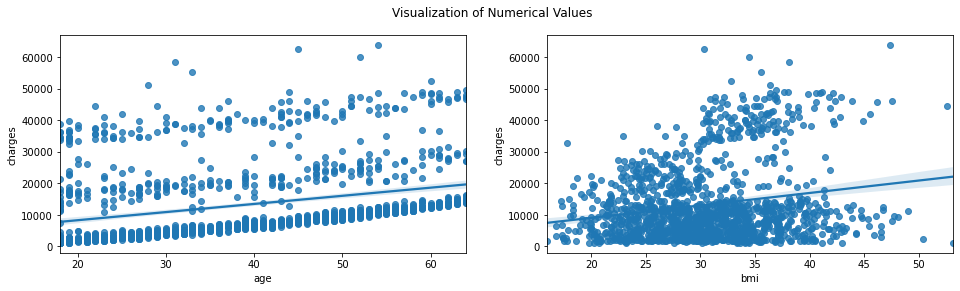

In [10]:
fig,axes= plt.subplots(1,2,figsize=(16,4))
fig.suptitle("Visualization of Numerical Values")
sns.regplot(x='age' ,y='charges', data=data,ax=axes[0])
sns.regplot(x='bmi' ,y='charges', data=data,ax=axes[1])

#### Lets plot categorical values

<AxesSubplot:xlabel='region', ylabel='charges'>

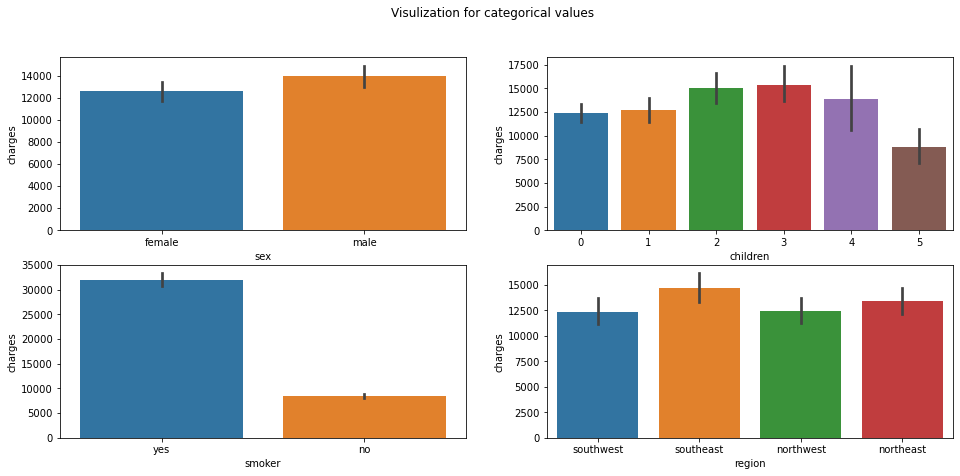

In [11]:
fig, axes = plt.subplots(2, 2, figsize = (16 ,7))
fig.suptitle("Visulization for categorical values")

sns.barplot(x = "sex", y = "charges", data = data, ax = axes[0,0])
sns.barplot(x = "children", y = "charges", data = data, ax = axes[0,1])
sns.barplot(x = "smoker", y = "charges", data = data, ax = axes[1,0])
sns.barplot(x = "region", y = "charges", data = data, ax = axes[1,1])

### Lets also check the pairplot, where we can put all the info at one place

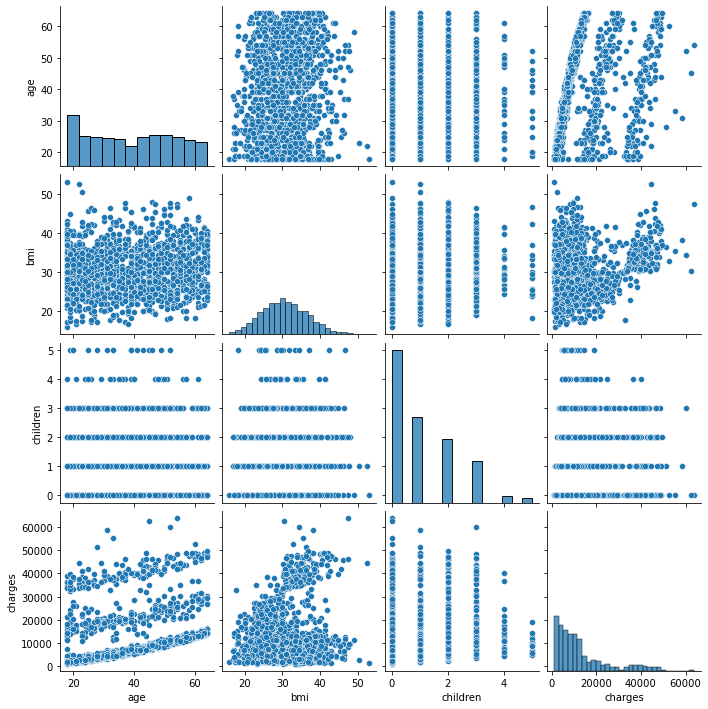

In [12]:
sns.pairplot(data=data)

#### Lets check if there are any outliers

<AxesSubplot:xlabel='charges'>

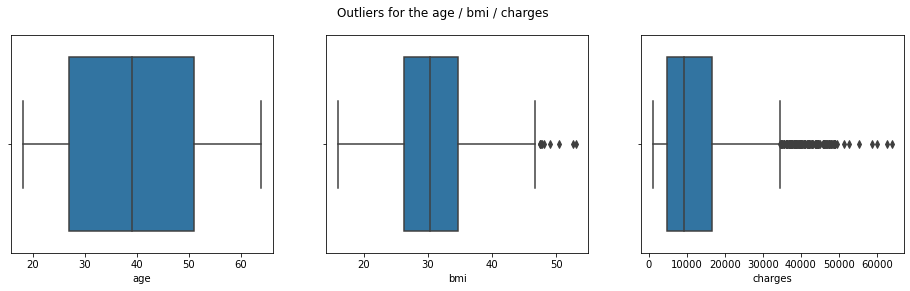

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (16,4))
fig.suptitle("Outliers for the age / bmi / charges")

sns.boxplot(x = "age", data = data, ax = axes[0])
sns.boxplot(x = "bmi", data = data, ax = axes[1])
sns.boxplot(x = "charges", data = data, ax = axes[2])

#### Lets see the hashmap and see the correlation between all the values

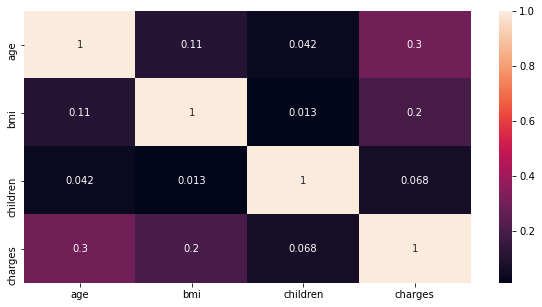

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [15]:
formula = "charges ~ age + sex + bmi + smoker + region"
model = ols.ols(formula = formula,data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     566.0
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:13:14   Log-Likelihood:                -13554.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1330   BIC:                         2.717e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.156e+04    

In [41]:
data = pd.get_dummies(data, columns = ["sex","smoker","region"], drop_first = True)

KeyError: "None of [Index(['sex', 'smoker', 'region'], dtype='object')] are in the [columns]"

In [38]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
train_data , test_data = train_test_split(data, test_size = 0.3, random_state = 42)



In [ ]:
print(train_data.shape)
print(test_data.shape)

In [29]:
X_train = train_data.drop("charges", axis = 1)
X_test = train_data["charges"]
Y_train = test_data.drop("charges", axis = 1)
Y_test = test_data["charges"]

In [30]:
LR = LinearRegression()
LR.fit(X_train,X_test)
pred = LR.predict(Y_train)


In [31]:
print("==========Linear Regression ==============")
print("Mean absolute error : "+str(metrics.mean_absolute_error(pred , Y_test)))
print("Mean sqaure error : "+str(metrics.mean_squared_error(pred , Y_test)))
print("Root Mean absolute error : "+str(np.sqrt(metrics.mean_squared_error(pred , Y_test))))
print("score : %.4f"% (LR.score(Y_train,Y_test)))
print("R2 Score : "+str(metrics.r2_score(pred , Y_test)))
print("==========Linear Regression ==============")

==========Linear Regression ==============
Mean absolute error : 4145.450555627585
Mean sqaure error : 33780509.57479163
Root Mean absolute error : 5812.10027225887
score : 0.7696
R2 Score : 0.6942952806198871
==========Linear Regression ==============


In [32]:
clf = RandomForestRegressor()
clf.fit(X_train,X_test)
clf_pred = clf.predict(Y_train)

In [33]:
print("==========Random Forst Regressor ==============")
print("Mean absolute error : "+str(metrics.mean_absolute_error(clf_pred , Y_test)))
print("Mean sqaure error : "+str(metrics.mean_squared_error(clf_pred , Y_test)))
print("Root Mean absolute error : "+str(np.sqrt(metrics.mean_squared_error(clf_pred , Y_test))))
print("score : %.4f"% (clf.score(Y_train,Y_test)))
print("R2 Score : "+str(metrics.r2_score(clf_pred , Y_test)))
print("==========Random Forst Regressor ==============")

==========Random Forst Regressor ==============
Mean absolute error : 2575.5660089171643
Mean sqaure error : 21199487.059764545
Root Mean absolute error : 4604.290071201482
score : 0.8554
R2 Score : 0.8444654193874954
==========Random Forst Regressor ==============


In [34]:
X = data.drop("charges", axis = 1)
Y = data["charges"]
final_clf = RandomForestRegressor()
final_clf.fit(X,Y)

RandomForestRegressor()

In [35]:
print("====== Prediction on some sample data ============")
print(final_clf.predict([[50,45,2,1,1,0,0,1]]))
print(clf.predict([[50,45,2,1,1,0,0,1]]))
print(LR.predict([[50,45,2,1,1,0,0,1]]))

====== Prediction on some sample data ============
[46273.0449566]
[45721.8257555]
[40046.78788029]


#### Uploading the model into the pickle fiel

In [36]:
file = open("insurance.pkl","wb")
pickle.dump(final_clf,file)